# Problemas de Regresión

### Carlos Adrián Palmieri Álvarez - A01635776

## Ejercicio 1

In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('../data/raw/crime_data.csv')
df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


In [44]:
X = df.drop(['State', 'H', 'VR', 'MR'], axis=1)
X.head()

,M,W,P,S
0,41.8,75.2,9.1,14.3
1,67.4,73.5,17.4,11.5
2,44.7,82.9,20.0,10.7
3,84.7,88.6,15.4,12.1
4,96.7,79.3,18.2,12.5


In [45]:
y = df['MR']
y.head()

0     9.0
1    11.6
2    10.2
3     8.6
4    13.1
Name: MR, dtype: float64

In [46]:
states = df['State']
states.head()

0    AK
1    AL
2    AR
3    AZ
4    CA
Name: State, dtype: object

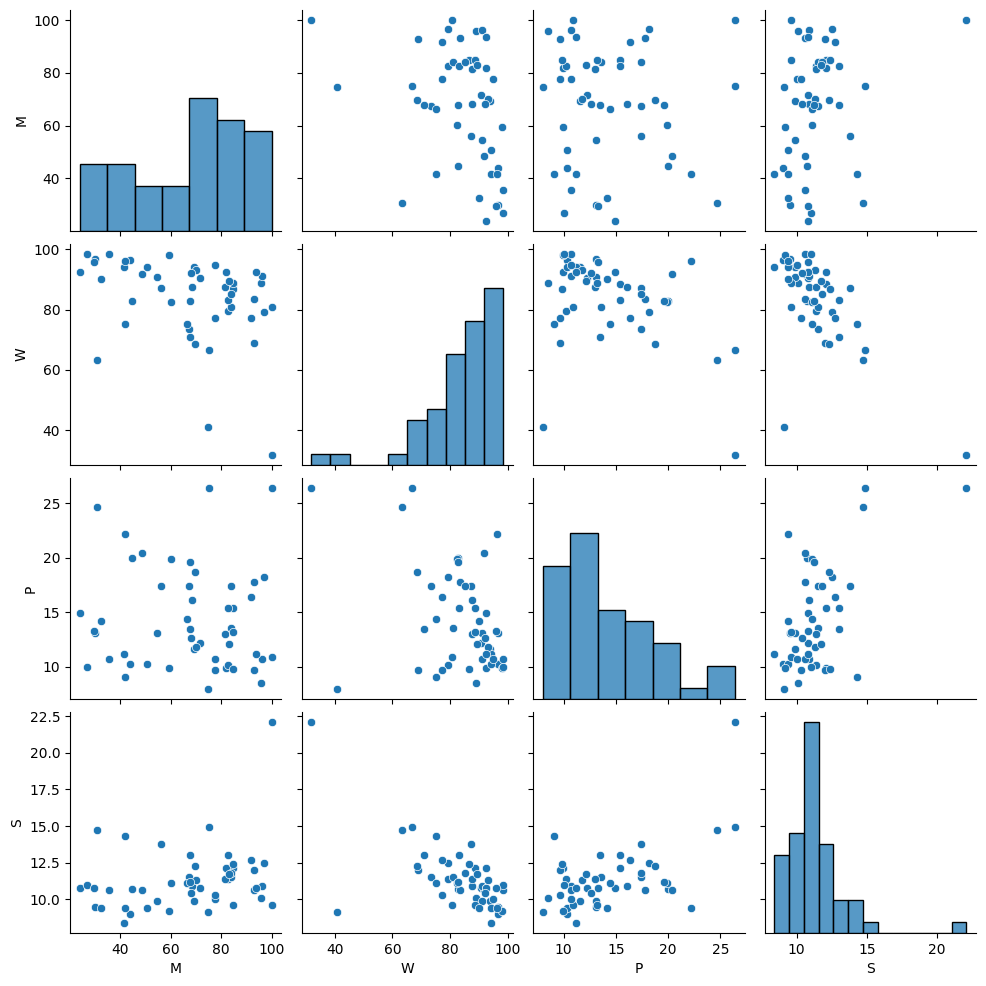

In [47]:
# Graficando los valores de X, y y states
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(X)
plt.show()

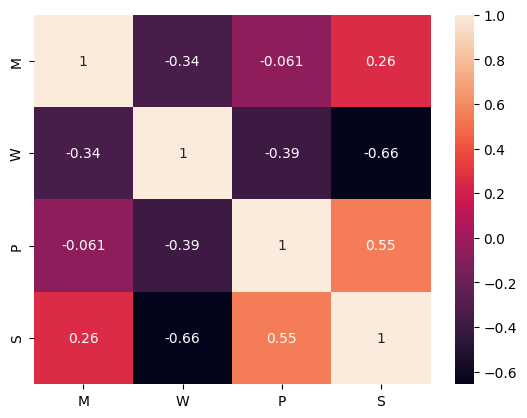

In [48]:
# Graficando la correlación entre las variables
sns.heatmap(X.corr(), annot=True)
plt.show()

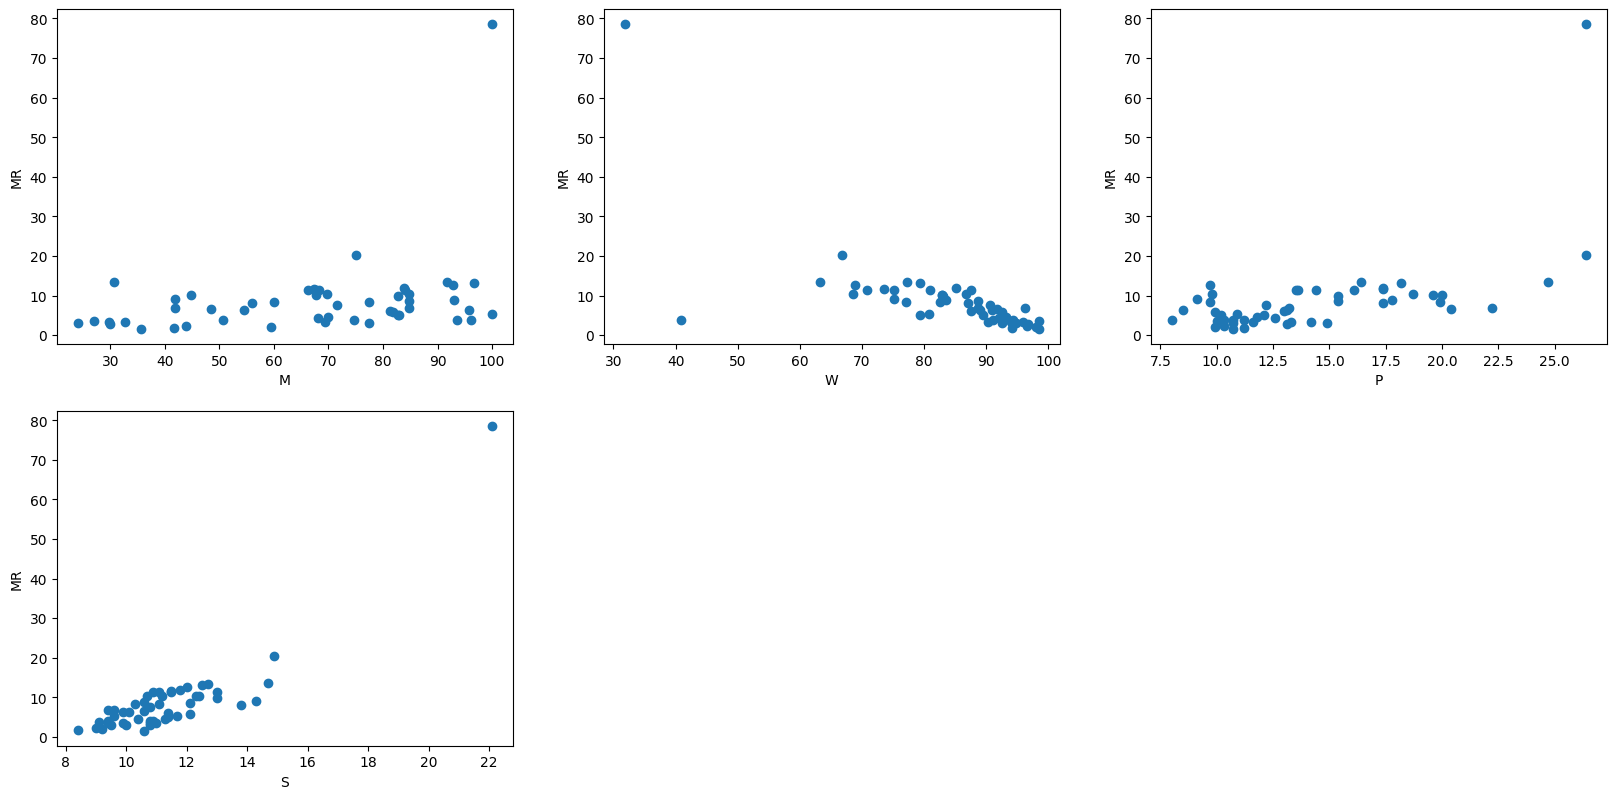

In [49]:
# Graficando cada columna de X contra y

fig = plt.figure(figsize=(20, 20))
for i in range(1, X.shape[1] + 1):
    plt.subplot(4, 3, i)
    plt.scatter(X.iloc[:, i - 1], y)
    plt.xlabel(X.columns[i - 1])
    plt.ylabel('MR')
plt.show()

### 1. Evalúa con validación cruzada un modelo perceptrón multicapa para las variables que se te asignaron para este ejercicio.

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [51]:
X = np.array(X)
y = np.array(y)

mse =  53.35315686927799
mse =  1.566227321586227
mse =  7.375189757657037
mse =  3.4667699748134964
mse =  453.2956463549782
MSE =  103.81139805566258


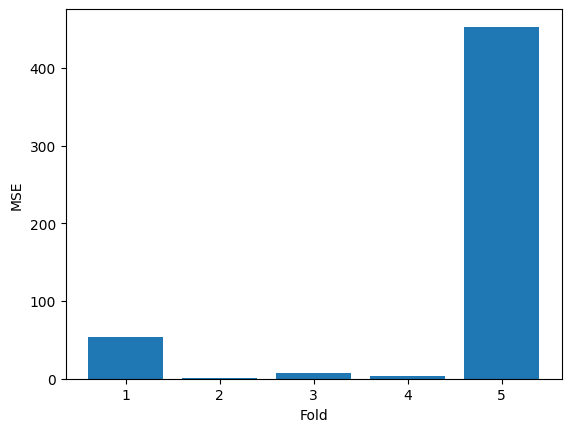

In [52]:
# 5-fold cross-validation
n_splits=5
kf = KFold(n_splits=n_splits, shuffle = True)

mse = 0
mse_l = []
for train_index, test_index in kf.split(X):

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]

    regr_cv = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000) 
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]    

    y_pred = regr_cv.predict(x_test)

    # Calculate MSE
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_l.append(mse_i)

    mse += mse_i 

mse = mse/n_splits
print('MSE = ', mse)

# Gráfica de barras
plt.bar(range(1, n_splits + 1), mse_l)
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()



### 2. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

#### A. ¿Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?

Si se realiza un ajuste en las RedesNeuronales correcto podría llegar a ser efectivo, sin embargo, las variables dependientes tienen un comportamiento lineal, por lo que otros modelos podrían ser más efectivos. 

#### B. ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el perceptrón multicapa? ¿Por qué?

El modelo lineal podría obtener mejores resultados y puede ser más efectivo ya que es un modelo menos complejo y que podría ajustarse mejor a las variables dependientes del dataset.

## Ejercicio 2

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). 

In [54]:
# Cargamos los datos del archivo de texto, la segunda columna se ignorará

datos = np.loadtxt('../data/raw/M_4.txt')
df = pd.DataFrame(datos)
df = df.drop(columns=[1])
df.rename(columns={0: 'act_muscular'}, inplace=True)

dict = {1: 'Flexionar hacia arriba', 2: 'Flexionar hacia abajo', 3: 'Cerrar la mano', 4: 'Estirar la mano', 5: 'Abrir la mano', 6: 'Coger un objeto', 7: 'No moverse'}

In [55]:
df 

,act_muscular,2,3,4,5,6,7,8,9,10,...,622,623,624,625,626,627,628,629,630,631
0,1.0,1.379487,0.894114,0.597094,-1.114525,0.176757,0.217511,0.957966,0.653276,0.467849,...,1.756593,-0.451745,1.794924,1.176389,-0.581349,1.466926,0.219139,-0.427162,1.545800,1.947798
1,1.0,-0.086426,0.058724,-0.361846,-1.202523,0.153521,-0.108678,-0.328419,-0.188628,-0.114548,...,0.091445,-0.673981,0.194601,0.247911,-1.135336,0.329500,-0.134775,-0.451924,0.076792,-0.187741
2,1.0,0.120878,0.279174,-0.076013,-0.602122,-0.666107,-0.630813,-0.271406,0.026564,-0.975923,...,-0.680615,-0.801010,-0.350549,0.302109,-1.757509,0.204798,-1.041059,-0.615934,0.351723,-0.737440
3,1.0,-0.351626,0.895506,0.354001,-0.984980,0.040372,0.888001,-0.337790,0.090245,0.560630,...,1.047266,-0.775160,1.170296,0.380971,-1.274298,1.070921,-0.134358,-0.370253,1.578293,0.371553
4,1.0,0.215150,-0.019875,-0.589697,-2.876677,-0.932048,-0.802137,-0.033036,-1.120116,-1.523562,...,-0.344517,-1.042312,-0.053075,0.072212,-1.613424,0.013676,-1.102570,-0.834125,1.310845,-0.121053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,7.0,-4.764398,-5.173067,-3.162772,-4.354816,-3.841628,-2.819353,-4.607093,-3.640769,-4.109369,...,-5.081282,-2.195790,-3.918950,-5.518796,-6.302458,-4.503126,-6.134198,-1.961771,-3.668271,-3.400192
626,7.0,-5.315286,-5.195915,-3.281644,-4.474814,-4.960719,-3.396900,-5.018654,-6.814412,-4.903666,...,-5.953465,-1.723648,-4.715917,-5.151268,-7.740101,-6.387718,-7.075405,-1.502264,-3.691837,-6.123619
627,7.0,-6.609802,-5.108913,-2.907823,-4.461101,-4.676772,-2.563865,-5.459646,-6.554167,-4.501447,...,-5.644879,-1.577503,-5.206570,-5.673828,-7.900117,-8.063860,-6.160683,-1.355751,-3.993137,-5.957840
628,7.0,-6.376412,-5.977268,-3.832173,-4.736427,-5.609423,-3.827419,-5.697619,-6.528336,-5.751097,...,-6.152191,-1.981974,-6.039118,-5.610517,-7.821325,-7.349157,-7.417253,-1.772635,-4.038534,-5.921882


### 1. Evalúa un modelo perceptrón multicapa con validación cruzada utilizando al menos 5 capas de 20 neuronas.

In [56]:
X = df.drop(['act_muscular'], axis=1)
y = df['act_muscular']

X = np.array(X)
y = np.array(y)

mse =  1.1210490304573186
mse =  1.2441956428348822
mse =  1.2749105384107104
mse =  1.2219426346688964
mse =  1.3900074936737323
MSE =  1.2504210680091081


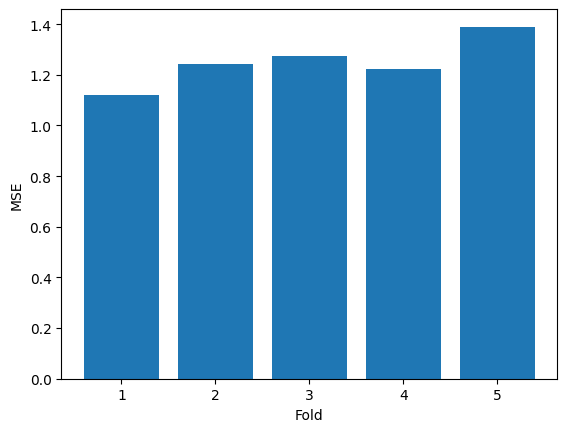

Precisión del modelo:  0.9105171958777799


In [59]:
# # 5-fold cross-validation
n_splits=5
kf = KFold(n_splits=n_splits, shuffle = True)

mse = 0
mse_l = []
for train_index, test_index in kf.split(X):

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]

    regr_cv = MLPRegressor(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=10000) 
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]    

    y_pred = regr_cv.predict(x_test)

    # Calculate MSE
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_l.append(mse_i)


    mse += mse_i 

mse = mse/n_splits
print('MSE = ', mse)

# Gráfica de barras
plt.bar(range(1, n_splits + 1), mse_l)
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()

print('Precisión del modelo: ', regr_cv.score(X, y))



### 2. Evalúa un modelo perceptrón multicapa con validación cruzada, pero encontrando el número óptimo de capas y neuronas de la red.

------- Evaluando modelo perceptrón multicapa con CV y optimización de parámetros -------
[879, 873, 968, 990]
Iteración:  1
	Parámetros seleccionados en GridSearchCV:
	 {'cv': 5, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('mlpregressor', MLPRegressor(max_iter=10000))], 'estimator__verbose': False, 'estimator__mlpregressor': MLPRegressor(max_iter=10000), 'estimator__mlpregressor__activation': 'relu', 'estimator__mlpregressor__alpha': 0.0001, 'estimator__mlpregressor__batch_size': 'auto', 'estimator__mlpregressor__beta_1': 0.9, 'estimator__mlpregressor__beta_2': 0.999, 'estimator__mlpregressor__early_stopping': False, 'estimator__mlpregressor__epsilon': 1e-08, 'estimator__mlpregressor__hidden_layer_sizes': (100,), 'estimator__mlpregressor__learning_rate': 'constant', 'estimator__mlpregressor__learning_rate_init': 0.001, 'estimator__mlpregressor__max_fun': 15000, 'estimator__mlpregressor__max_iter': 10000, 'estimator__mlpregressor__momentum': 0.9, 'estimator__ml

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


mse =  0.992466829294523
Iteración:  2
	Parámetros seleccionados en GridSearchCV:
	 {'cv': 5, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('mlpregressor', MLPRegressor(max_iter=10000))], 'estimator__verbose': False, 'estimator__mlpregressor': MLPRegressor(max_iter=10000), 'estimator__mlpregressor__activation': 'relu', 'estimator__mlpregressor__alpha': 0.0001, 'estimator__mlpregressor__batch_size': 'auto', 'estimator__mlpregressor__beta_1': 0.9, 'estimator__mlpregressor__beta_2': 0.999, 'estimator__mlpregressor__early_stopping': False, 'estimator__mlpregressor__epsilon': 1e-08, 'estimator__mlpregressor__hidden_layer_sizes': (100,), 'estimator__mlpregressor__learning_rate': 'constant', 'estimator__mlpregressor__learning_rate_init': 0.001, 'estimator__mlpregressor__max_fun': 15000, 'estimator__mlpregressor__max_iter': 10000, 'estimator__mlpregressor__momentum': 0.9, 'estimator__mlpregressor__n_iter_no_change': 10, 'estimator__mlpregressor__nesterovs_momentum': True

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


mse =  1.1557154847660547
Iteración:  3
	Parámetros seleccionados en GridSearchCV:
	 {'cv': 5, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('mlpregressor', MLPRegressor(max_iter=10000))], 'estimator__verbose': False, 'estimator__mlpregressor': MLPRegressor(max_iter=10000), 'estimator__mlpregressor__activation': 'relu', 'estimator__mlpregressor__alpha': 0.0001, 'estimator__mlpregressor__batch_size': 'auto', 'estimator__mlpregressor__beta_1': 0.9, 'estimator__mlpregressor__beta_2': 0.999, 'estimator__mlpregressor__early_stopping': False, 'estimator__mlpregressor__epsilon': 1e-08, 'estimator__mlpregressor__hidden_layer_sizes': (100,), 'estimator__mlpregressor__learning_rate': 'constant', 'estimator__mlpregressor__learning_rate_init': 0.001, 'estimator__mlpregressor__max_fun': 15000, 'estimator__mlpregressor__max_iter': 10000, 'estimator__mlpregressor__momentum': 0.9, 'estimator__mlpregressor__n_iter_no_change': 10, 'estimator__mlpregressor__nesterovs_momentum': Tru

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


mse =  1.1036893423329566
Iteración:  4
	Parámetros seleccionados en GridSearchCV:
	 {'cv': 5, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('mlpregressor', MLPRegressor(max_iter=10000))], 'estimator__verbose': False, 'estimator__mlpregressor': MLPRegressor(max_iter=10000), 'estimator__mlpregressor__activation': 'relu', 'estimator__mlpregressor__alpha': 0.0001, 'estimator__mlpregressor__batch_size': 'auto', 'estimator__mlpregressor__beta_1': 0.9, 'estimator__mlpregressor__beta_2': 0.999, 'estimator__mlpregressor__early_stopping': False, 'estimator__mlpregressor__epsilon': 1e-08, 'estimator__mlpregressor__hidden_layer_sizes': (100,), 'estimator__mlpregressor__learning_rate': 'constant', 'estimator__mlpregressor__learning_rate_init': 0.001, 'estimator__mlpregressor__max_fun': 15000, 'estimator__mlpregressor__max_iter': 10000, 'estimator__mlpregressor__momentum': 0.9, 'estimator__mlpregressor__n_iter_no_change': 10, 'estimator__mlpregressor__nesterovs_momentum': Tru

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


mse =  0.805594311475024
Iteración:  5
	Parámetros seleccionados en GridSearchCV:
	 {'cv': 5, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('mlpregressor', MLPRegressor(max_iter=10000))], 'estimator__verbose': False, 'estimator__mlpregressor': MLPRegressor(max_iter=10000), 'estimator__mlpregressor__activation': 'relu', 'estimator__mlpregressor__alpha': 0.0001, 'estimator__mlpregressor__batch_size': 'auto', 'estimator__mlpregressor__beta_1': 0.9, 'estimator__mlpregressor__beta_2': 0.999, 'estimator__mlpregressor__early_stopping': False, 'estimator__mlpregressor__epsilon': 1e-08, 'estimator__mlpregressor__hidden_layer_sizes': (100,), 'estimator__mlpregressor__learning_rate': 'constant', 'estimator__mlpregressor__learning_rate_init': 0.001, 'estimator__mlpregressor__max_fun': 15000, 'estimator__mlpregressor__max_iter': 10000, 'estimator__mlpregressor__momentum': 0.9, 'estimator__mlpregressor__n_iter_no_change': 10, 'estimator__mlpregressor__nesterovs_momentum': True

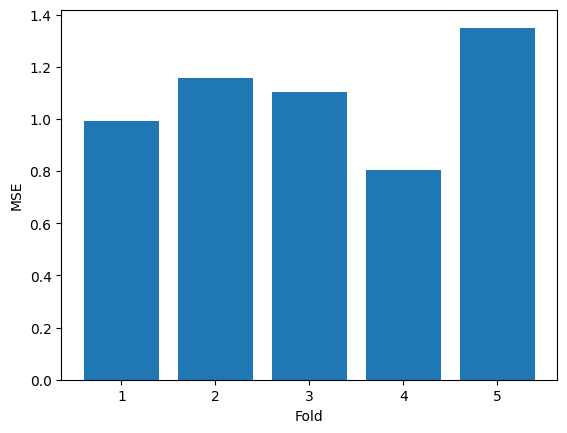

In [16]:
# # 5-fold cross-validation
print('------- Evaluando modelo perceptrón multicapa con CV y optimización de parámetros -------')
n_splits=5
kf = KFold(n_splits=n_splits, shuffle = True)

mse = 0
mse_l = []

hidden_layer_sizes = [(20, 20), 
                      (20, 20, 20), 
                      (20, 20, 20, 20), 
                      (30, 30, 30, 30), 
                      (30, 30, 30,),
                      (30, 30)]

alphas = np.random.uniform(0.0001, 1, 6)
max_iters = []
# Agregando valores aleatorios a max_iters
for i in range(4):
    max_iters.append(np.random.randint(600, 1000))
print(max_iters)


for train_index, test_index in kf.split(X):
    print('Iteración: ', len(mse_l) + 1)

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]

    pipe = make_pipeline(MLPRegressor(max_iter=10000))

    param_grid = {
        'mlpregressor__hidden_layer_sizes': hidden_layer_sizes,
        'mlpregressor__alpha': alphas,
        'mlpregressor__max_iter': max_iters
    }

    regr_cv = GridSearchCV(pipe, param_grid, cv=5)
    print('\tParámetros seleccionados en GridSearchCV:')

    for i in range(len(regr_cv.get_params()['param_grid'])):
        print('\t', regr_cv.get_params(deep=True,))

    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]    

    y_pred = regr_cv.predict(x_test)

    # Calculate MSE
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_l.append(mse_i)

    mse += mse_i 

mse = mse/n_splits
print('MSE = ', mse)

# Gráfica de barras
plt.bar(range(1, n_splits + 1), mse_l)
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()


### 3. Prepara el modelo perceptrón multicapa:


#### A. Opten los hiperparámetros óptimos de capas y neuronas de la red.

------- Evaluando modelo perceptrón multicapa con CV y optimización de parámetros -------
Iteración:  1
	Parámetros seleccionados en GridSearchCV:
	 {'cv': 5, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('mlpregressor', MLPRegressor(max_iter=10000))], 'estimator__verbose': False, 'estimator__mlpregressor': MLPRegressor(max_iter=10000), 'estimator__mlpregressor__activation': 'relu', 'estimator__mlpregressor__alpha': 0.0001, 'estimator__mlpregressor__batch_size': 'auto', 'estimator__mlpregressor__beta_1': 0.9, 'estimator__mlpregressor__beta_2': 0.999, 'estimator__mlpregressor__early_stopping': False, 'estimator__mlpregressor__epsilon': 1e-08, 'estimator__mlpregressor__hidden_layer_sizes': (100,), 'estimator__mlpregressor__learning_rate': 'constant', 'estimator__mlpregressor__learning_rate_init': 0.001, 'estimator__mlpregressor__max_fun': 15000, 'estimator__mlpregressor__max_iter': 10000, 'estimator__mlpregressor__momentum': 0.9, 'estimator__mlpregressor__n_iter_no

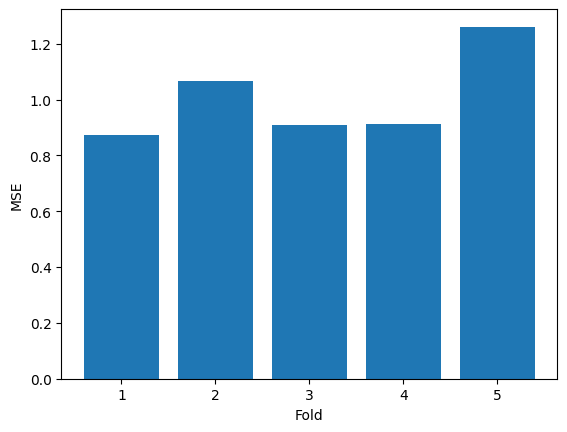

In [62]:
# Obteniendo el número de capas ocultas y el número de neuronas por capa óptimo
# # 5-fold cross-validation
print('------- Evaluando modelo perceptrón multicapa con CV y optimización de parámetros -------')
n_splits=5
kf = KFold(n_splits=n_splits, shuffle = True)

mse = 0
mse_l = []

hidden_layer_sizes = []
for i in range(1, 21):
    val = np.random.randint(20, 80)
    hidden_layer_sizes.append((val,val))
    hidden_layer_sizes.append((val,val,val))
    hidden_layer_sizes.append((val,val,val,val))
    hidden_layer_sizes.append((val,val,val,val,val))

for train_index, test_index in kf.split(X):
    print('Iteración: ', len(mse_l) + 1)

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]

    pipe = make_pipeline(MLPRegressor(max_iter=10000))

    param_grid = {
        'mlpregressor__hidden_layer_sizes': hidden_layer_sizes,
    }

    regr_cv = GridSearchCV(pipe, param_grid, cv=5)
    print('\tParámetros seleccionados en GridSearchCV:')

    for i in range(len(regr_cv.get_params()['param_grid'])):
        print('\t', regr_cv.get_params(deep=True,))

    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]    

    y_pred = regr_cv.predict(x_test)

    # Calculate MSE
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_l.append(mse_i)

    mse += mse_i 

mse = mse/n_splits
print('MSE = ', mse)

# Gráfica de barras
plt.bar(range(1, n_splits + 1), mse_l)
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()



In [63]:
# Mejores hiperparámetros
print('Mejores hiperparámetros:')
print(regr_cv.best_params_)

Mejores hiperparámetros:
{'mlpregressor__hidden_layer_sizes': (45, 45, 45, 45)}


#### B. Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [64]:
#Ajuste del modelo con los mejores hiperparámetros
best_params = regr_cv.best_params_['mlpregressor__hidden_layer_sizes']

regr = MLPRegressor(hidden_layer_sizes=best_params, max_iter=10000)
regr.fit(X, y)

print('Coeficientes: ', regr.coefs_)
print('Interceptos: ', regr.intercepts_)
print('Precisión del modelo: ', regr.score(X, y))


Coeficientes:  [array([[-0.0048216 ,  0.05858991, -0.04318016, ..., -0.02061565,
        -0.01203632, -0.06343414],
       [-0.02899613,  0.02713056, -0.07288561, ...,  0.04328761,
        -0.05080785,  0.10315217],
       [ 0.0187673 ,  0.03341508,  0.06313255, ..., -0.06158604,
         0.08793622, -0.01255286],
       ...,
       [ 0.04653568, -0.00580154,  0.0582369 , ..., -0.05783995,
         0.0694308 , -0.08761482],
       [ 0.03106805,  0.02767651, -0.01427434, ...,  0.05803923,
        -0.03814473,  0.02966995],
       [-0.02355706, -0.07787931, -0.05242777, ...,  0.07062347,
         0.02961181,  0.00600051]]), array([[ 0.12617416,  0.28922728, -0.02830489, ..., -0.1218065 ,
         0.28353345,  0.16565679],
       [ 0.02372635,  0.20762113,  0.21411159, ..., -0.16906392,
         0.09593423,  0.00751843],
       [ 0.1856468 ,  0.24224445,  0.18463225, ..., -0.07933641,
        -0.20110194, -0.09691053],
       ...,
       [-0.10166016, -0.03644607, -0.01632561, ...,  0.235

### 4. Contesta lo siguientes:

#### A. ¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? Argumenta tu respuesta.

En diferentes intentos, aumentaba en promedio 2% de precisión; el hacer una búsqueda de hiperparámetros ayuda a que el modelo logre mejores resultados, sin embargo, al ser poquitos datos, podría llegar a hacer un sobreajuste.

Al hacer las diferentes pruebas, la búsqueda de hiperparámetros seleccionaba una red neuronal con más capas y menos neuronas dentro de ella, si se genera una búsqueda de hiperparámetros con más capas podría lograr una mejor en el rendimiento.

#### B. ¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?

Podría llegar a aumentar la varianza del modelo lo cual puedo generar que al agregar nuevos datos para predecir, no de un buen resultado debido al sobreajuste en los datos. Esto sucede debido a que el método de resolución del peso de cada neurona es ajustado por "adam" un descenso de gradiente estocástico y provoca un ajuste a la información de los datos. Se podría reducir el sobreajuste con una regularización "dropout" debido a que tenemos un tamaño de datos pequeño.

## Ejercicio 3

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

In [65]:
# Cargamos los datos del archivo de texto, la segunda columna se ignorará

datos = np.loadtxt('../data/raw/P1_4.txt')
df = pd.DataFrame(datos)
df = df.drop(columns=[1])
df.rename(columns={0: 'atencion'}, inplace=True)

# Si encuentra un valor 2 en la columna atencion, lo cambia por 0
df['atencion'] = df['atencion'].replace(2, 0)
df

,atencion,2,3,4,5,6,7,8,9,10,...,145,146,147,148,149,150,151,152,153,154
0,1.0,0.350647,-0.424993,-0.660866,-0.815144,-1.241745,-1.665021,-1.618643,-1.196400,-1.047875,...,-1.251889,-1.970338,-2.506193,-2.352022,-1.766605,-1.276660,-0.914575,-0.319748,0.595015,1.473851
1,1.0,1.580375,1.176607,-0.191975,-0.932377,-0.439725,0.438743,0.719484,0.432720,0.185609,...,-0.523751,0.549496,1.015399,0.906942,0.703602,0.556465,0.303205,0.051880,0.104996,0.324812
2,1.0,-0.316008,1.056184,2.025188,2.206168,2.072054,2.076986,2.022388,1.503590,0.621748,...,-1.121012,-1.051379,-0.297674,0.353843,0.345961,0.195128,0.642133,1.445067,1.671265,1.014228
3,1.0,-1.093552,-0.910001,-1.003384,-1.055967,-0.878846,-0.658754,-0.426029,0.158841,1.106279,...,-0.196825,-0.832196,-0.943520,-0.431187,0.066089,-0.036773,-0.618627,-1.023145,-0.716475,0.219482
4,1.0,-0.146399,-0.110799,0.455934,0.876946,0.684550,0.132343,-0.305652,-0.535346,-0.711652,...,-1.223037,-1.154985,-0.900329,-0.697651,-0.769296,-0.932597,-0.743404,-0.096057,0.582817,0.885652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0.0,-1.588847,-1.427003,-0.269426,0.696609,0.623781,-0.030702,-0.452824,-0.661629,-1.124753,...,0.667013,0.938670,0.973536,0.856223,0.744666,0.586719,0.334001,0.207453,0.410789,0.637030
1190,0.0,0.786812,0.614816,0.097663,-0.675592,-0.914119,-0.122366,0.934836,0.969639,-0.150785,...,0.942854,1.317201,1.396222,1.146528,0.732923,0.260424,-0.135460,-0.194619,0.110225,0.290046
1191,0.0,0.835499,0.217704,-0.026337,-0.081543,-0.149609,-0.142239,-0.030333,-0.043847,-0.277810,...,0.581388,0.970642,1.261227,1.389007,1.349219,1.032691,0.288468,-0.694130,-1.330831,-1.242224
1192,0.0,-1.002186,-1.447046,-1.189321,-0.399778,0.305956,0.485641,0.154627,-0.328849,-0.539770,...,0.770430,1.359351,1.057704,0.161317,-0.361443,-0.196288,0.031061,-0.228708,-0.750366,-1.008360


In [73]:
# Balance de clases
print('Balance de clases:')
print(df['atencion'].value_counts())

# Balanceo de las clases
from imblearn.over_sampling import SMOTE

X = df.drop(['atencion'], axis=1)
y = df['atencion']


Balance de clases:
atencion
0.0    895
1.0    299
Name: count, dtype: int64


In [76]:
smote = SMOTE(sampling_strategy='all')
X_sm, y_sm = smote.fit_resample(X, y)

print('Balance de clases después de aplicar SMOTE:')
print(y_sm.value_counts())
print('X_sm shape: ', X_sm.shape)

Balance de clases después de aplicar SMOTE:
atencion
1.0    895
0.0    895
Name: count, dtype: int64
X_sm shape:  (1790, 153)


### 1. Implementa un modelo perceptrón de una neurona entrenado con descenso de gradiente estocástico, y evalúalo con validación cruzada. Para esta caso, es necesario que encuentres la gráfica de Época Vs Exactitud.

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [81]:
# Perceptron function
def perceptron(x, w):
    ws = sum(x*w)
    yt = 0
    if ws < 0:
        yt = -1
    elif ws > 0:
        yt = 1

    return yt

In [82]:
# Perceptron function for multiple observations
def perceptron_mult(x, w):   
    yp = []
    for xi in x:
        yp.append(perceptron(xi, w))
    return np.array(yp)

In [89]:
# Stochastic gradient descent
def train_perceptron_sg(x, y, x_test = None, y_test = None, n_epochs = 20, alpha = 0.001):
    
    n = x.shape[0]
    n_features = x.shape[1]
    print(n)

    # Random initialization    
    w = 2*np.random.rand(n_features)-1

    # Calculate model
    epoch_acc = []
    for epoch in range(n_epochs):

        # Random indices
        indices = np.random.permutation(n)    

        # Update model
        for index in indices:

            # Evaluate perceptron
            yp = perceptron(x[index,:], w)

            # Update weights            
            w = w + alpha*(y[index]-yp)*x[index,:]

        # Evaluate performance
        if x_test is not None and y_test is not None:
            y_test_pred = perceptron_mult(x_test, w)
            acc = accuracy_score(y_test, y_test_pred)
            epoch_acc.append(acc)

    # Return model (and accuracy)
    if x_test is not None and y_test is not None:
        epoch_acc = np.array(epoch_acc)
        return {'w':w, 'acc':epoch_acc[-1], 'epoch_acc': epoch_acc}

    return {'w':w}


In [98]:
X = np.array(X_sm)
y = np.array(y_sm)

X.shape

(1790, 153)

1790
{'w': array([ 0.00693387, -0.03793642,  0.02882366, -0.08691817,  0.27276769,
       -0.54799004,  0.62003821, -0.21180981, -0.3373125 ,  0.50509999,
       -0.14019274, -0.17126703, -0.0086315 ,  0.23898191,  0.04639633,
       -0.55994841,  0.60191582, -0.02683681, -0.48259496,  0.39622328,
       -0.21933587,  0.17481352, -0.08062579, -0.40206437,  0.88130034,
       -0.68229002,  0.02650413,  0.42470803, -0.40156509,  0.32026796,
       -0.31014549,  0.17352791,  0.20552241, -0.48730555,  0.47833744,
       -0.38552754,  0.41743322, -0.43566272,  0.37027255, -0.21532309,
        0.02114333,  0.2581502 , -0.49508508,  0.46508583, -0.11004805,
       -0.26949758,  0.4322726 , -0.37717869,  0.28635713, -0.19560284,
        0.068723  ,  0.06175614, -0.31662764,  0.6415145 , -0.64243376,
        0.16763092,  0.26221649, -0.03649541, -0.64973384,  0.96029905,
       -0.49635403, -0.10245511,  0.18023597,  0.20541074, -0.33566748,
        0.19467764, -0.14390296,  0.20639098, -0.0634

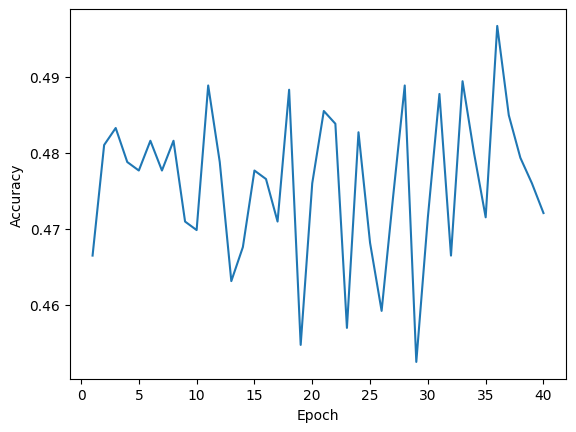

In [92]:
n_epochs = 40
alpha = 0.001

model = train_perceptron_sg(X, y, x_test = X, y_test = y, n_epochs = n_epochs, alpha = alpha)
print(model)

plt.plot(np.arange(1, n_epochs+1, 1), model['epoch_acc'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


Buena precisión en la época 36.

1611
1611
1611
1611
1611
1611
1611
1611
1611
1611
ACC:  0.4692737430167598


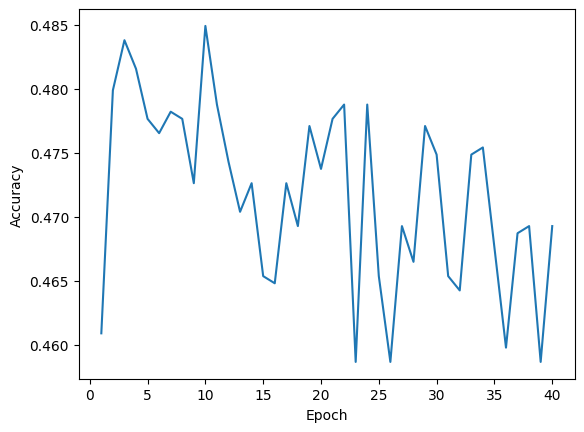

In [93]:
# Evaluate stochastic gradient using cross validation
nk = 10
kf = StratifiedKFold(n_splits = nk, shuffle = True)

acc = 0
epoch_acc = np.zeros(n_epochs)
for train_index, test_index in kf.split(X, y):
    
    x_train = X[train_index, :]
    y_train = y[train_index]

    x_test = X[test_index, :]
    y_test = y[test_index]

    # Train perceptron
    model = train_perceptron_sg(x_train, y_train, x_test = x_test, y_test = y_test, n_epochs = n_epochs, alpha = alpha)
    acc += model['acc']
    epoch_acc+=model['epoch_acc']    

acc /= nk
epoch_acc /= nk
print("ACC: ", acc)

plt.plot(np.arange(1, n_epochs+1, 1), epoch_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Buena precisión en la época 11

### 2. Repite el paso anterior, pero utilizando descenso de gradiente de lote y de mini-lote para entrenar el modelo.

#### Descenso de Gradiente de lote

##### Descenso de gradiente de lote (batch gradiente descent). Se calcula la suma de todos los gradientes ∇𝐿𝑖 para solo hacer una actualización del modelo con todos los datos.

In [99]:
# Training routine (batch optimization)
def train_perceptron_batch(x, y, x_test = None, y_test = None, n_epochs = 20, alpha = 0.001):
    
    n = x.shape[0]
    n_features = x.shape[1]

    # Random initialization    
    w = 2*np.random.rand(n_features)-1

    # Calculate model
    epoch_acc = []
    for epoch in range(n_epochs):        

        # Initialize gradient
        grad = np.zeros(n_features)

        # Calculate gradient
        for i in range(n):

            # Evaluate perceptron
            yp = perceptron(x[i,:], w)

            # Calculate gradient
            grad += (y[i]-yp)*x[i,:]

        # Update weights
        w = w + alpha*grad

        # Evaluate performance
        if x_test is not None and y_test is not None:
            y_test_pred = perceptron_mult(x_test, w)
            acc = accuracy_score(y_test, y_test_pred)
            epoch_acc.append(acc)

    # Return model (and accuracy)
    if x_test is not None and y_test is not None:
        epoch_acc = np.array(epoch_acc)
        return {'w':w, 'acc':epoch_acc[-1], 'epoch_acc': epoch_acc}

    return {'w':w}

{'w': array([ 9.22859206e-02,  2.08961653e-01, -4.04235602e-01,  3.17094732e-01,
       -1.49959394e-01,  6.38426030e-01, -2.66455890e-01,  2.71076687e-01,
        1.01898600e+00, -5.25801002e-01,  3.69435065e-01, -8.40687234e-01,
        7.78948441e-01, -5.88122582e-01,  2.00564919e-03,  5.10937136e-01,
       -4.02117494e-01,  7.13618124e-02, -9.43550742e-01, -2.99844535e-01,
       -4.19718510e-01, -1.27425623e-01, -2.86149544e-01,  1.07622256e+00,
       -3.19433976e-01,  3.52879788e-01,  2.63843854e-01,  2.98268531e-02,
       -4.20514115e-01,  4.99931222e-01, -3.60630288e-01,  1.20465493e-01,
        2.94935437e-02,  1.65893453e-01, -1.53127840e-02,  2.03658895e-01,
        6.91385266e-02,  5.85929781e-01, -2.94482448e-01,  6.25519991e-01,
       -4.40370979e-01,  4.07676844e-02,  5.26420531e-01, -8.45476408e-01,
        3.04693703e-01,  5.26122527e-02,  4.21512451e-01, -5.58978972e-01,
        4.49857193e-01, -2.38506748e-01, -4.42146348e-02, -1.63025140e-01,
        1.83357343e

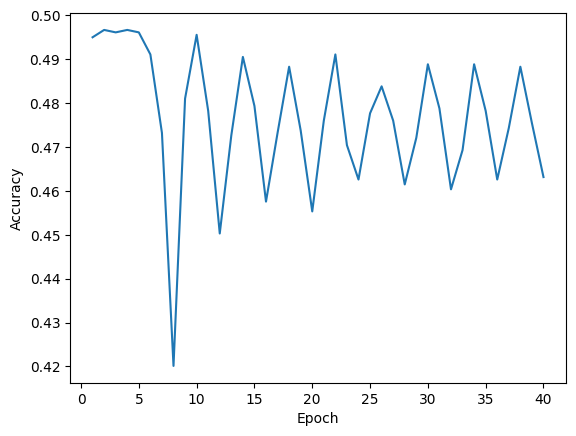

In [101]:
##### Batch optimization #####
n_epochs = 40
alpha = 0.001

model = train_perceptron_batch(X, y, x_test = X, y_test = y, n_epochs = n_epochs, alpha = alpha)
print(model)

plt.plot(np.arange(1, n_epochs+1, 1), model['epoch_acc'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


ACC:  0.4748603351955308


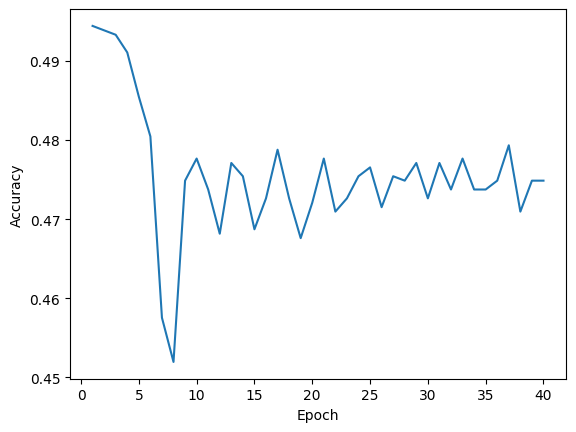

In [102]:
# Evaluate batch optimization using cross validation
nk = 10
kf = StratifiedKFold(n_splits = nk, shuffle = True)

acc = 0
epoch_acc = np.zeros(n_epochs)
for train_index, test_index in kf.split(X, y):
    
    x_train = X[train_index, :]
    y_train = y[train_index]

    x_test = X[test_index, :]
    y_test = y[test_index]

    # Train perceptron
    model = train_perceptron_batch(x_train, y_train, x_test = x_test, y_test = y_test, n_epochs = n_epochs, alpha = alpha)
    acc += model['acc']
    epoch_acc+=model['epoch_acc']
    

acc /= nk
epoch_acc /= nk
print("ACC: ", acc)

plt.plot(np.arange(1, n_epochs+1, 1), epoch_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

#### Descenso de Gradiente de mini-lote

In [103]:
# Training routine (mini-batch optimization)
def train_perceptron_mini_batch(x, y, x_test = None, y_test = None, n_epochs = 20, alpha = 0.001, batch_size = 5):
    
    n = x.shape[0]
    n_features = x.shape[1]

    # Random initialization    
    w = 2*np.random.rand(n_features)-1

    # Calculate model
    n_updates = n//batch_size + int(n%batch_size >0)
    epoch_acc = []
    for epoch in range(n_epochs):        

        # Random indices
        indices = np.random.permutation(n)            

        # Update model        
        j = 0
        for i in range(n_updates):

            # Initialize gradient
            grad = np.zeros(n_features)

            # Calculate gradient
            counter = 0
            for b in range(batch_size):                

                if j >= n:
                    continue

                # Evaluate perceptron
                yp = perceptron(x[indices[j],:], w)

                # Calculate gradient
                grad += (y[indices[j]]-yp)*x[indices[j],:]

                # Update counters
                counter+=1
                j+=1
              
            # Update weights
            w = w + alpha*grad        

        # Evaluate performance
        if x_test is not None and y_test is not None:
            y_test_pred = perceptron_mult(x_test, w)
            acc = accuracy_score(y_test, y_test_pred)
            epoch_acc.append(acc)

    # Return model (and accuracy)
    if x_test is not None and y_test is not None:
        epoch_acc = np.array(epoch_acc)
        return {'w':w, 'acc':epoch_acc[-1], 'epoch_acc': epoch_acc}

    return {'w':w}


{'w': array([ 0.08524438, -0.12747536, -0.03254148,  0.18996477, -0.08275608,
       -0.21044839,  0.23064456,  0.13252726, -0.35022042,  0.08503422,
        0.21219571, -0.16460741, -0.06226546, -0.00470216,  0.15603195,
        0.16022612, -0.61714224,  0.61001868, -0.17627815, -0.18024999,
        0.0552189 ,  0.15622504, -0.32494651,  0.45583193, -0.41108315,
        0.09701825,  0.21253566, -0.02286823, -0.44836814,  0.58858641,
       -0.17648997, -0.2752881 ,  0.3271608 , -0.09617206, -0.10760661,
        0.1248778 , -0.11360345,  0.23348541, -0.518025  ,  0.75326035,
       -0.69461126,  0.2706558 ,  0.14378227, -0.32658352,  0.31816801,
       -0.23307664,  0.00445941,  0.31259449, -0.49060985,  0.38900408,
       -0.13415668, -0.00230522,  0.03321946, -0.12313972,  0.33216641,
       -0.54928575,  0.37423421,  0.2473122 , -0.84686516,  0.70794509,
       -0.02297251, -0.35883722,  0.10254893,  0.20646071,  0.16055339,
       -0.69245599,  0.52868905,  0.14312974, -0.20806384,

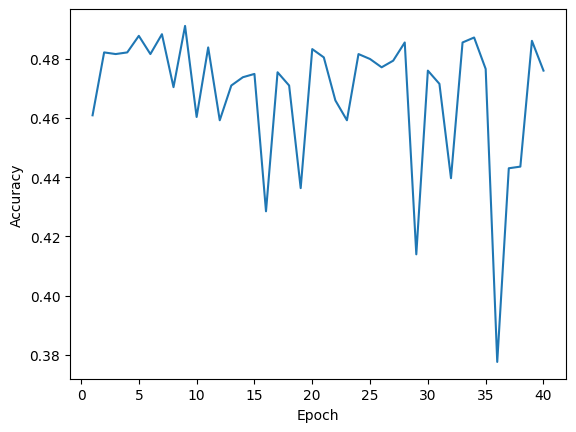

In [105]:
##### Mini-batch optimization #####
n_epochs = 40
alpha = 0.001
batch_size = 5

model = train_perceptron_mini_batch(X, y, x_test = X, y_test = y, n_epochs = n_epochs, alpha = alpha, batch_size = batch_size)
print(model)

plt.plot(np.arange(1, n_epochs+1, 1), model['epoch_acc'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

ACC:  0.47486033519553067


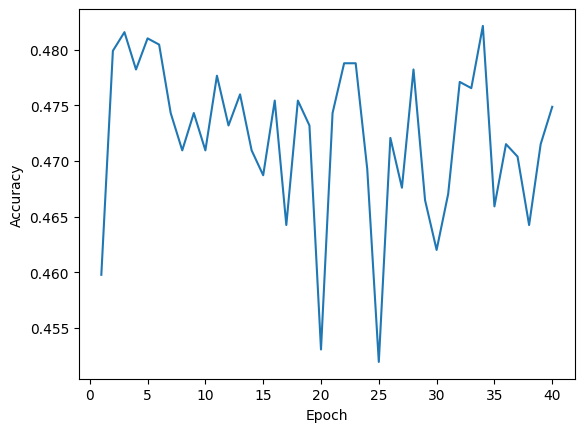

In [106]:
# Evaluate mini-batch optimization using cross validation
nk = 10
kf = StratifiedKFold(n_splits = nk, shuffle = True)

acc = 0
epoch_acc = np.zeros(n_epochs)
for train_index, test_index in kf.split(X, y):
    
    x_train = X[train_index, :]
    y_train = y[train_index]

    x_test = X[test_index, :]
    y_test = y[test_index]

    # Train perceptron
    model = train_perceptron_mini_batch(x_train, y_train, x_test = x_test, y_test = y_test, n_epochs = n_epochs, alpha = alpha, batch_size = batch_size)
    acc += model['acc']
    epoch_acc+=model['epoch_acc']
    

acc /= nk
epoch_acc /= nk
print("ACC: ", acc)

plt.plot(np.arange(1, n_epochs+1, 1), epoch_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


### 3.Evalúa un modelo perceptrón multicapa con validación cruzada. Para este caso, puedes utilizar un modelo dado por scikit-learn, Keras o Pytorch.

Iteración:  1
mse =  0.06183569493480487
Iteración:  2
mse =  0.06602831324709964
Iteración:  3
mse =  0.05793491305014979
Iteración:  4
mse =  0.05387700519928807
Iteración:  5
mse =  0.0443135345683746
Iteración:  6
mse =  0.052989641117532134
Iteración:  7
mse =  0.06002371133443476
Iteración:  8
mse =  0.06107402240010297
Iteración:  9
mse =  0.07309765133066112
Iteración:  10
mse =  0.05942613820106282
MSE =  0.059060062538351076


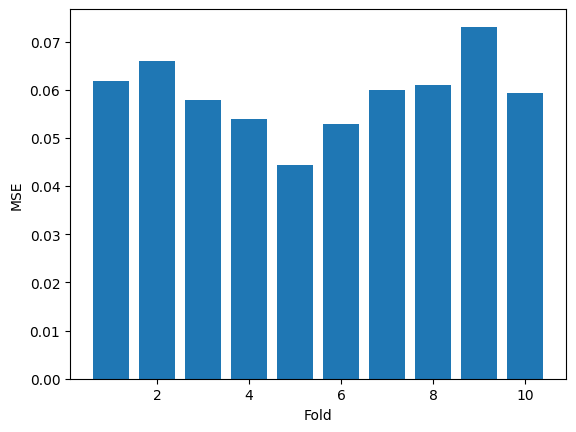

In [110]:
# # 5-fold cross-validation
n_splits=10
kf = KFold(n_splits=n_splits, shuffle = True)

mse = 0
mse_l = []
for train_index, test_index in kf.split(X):
    print('Iteración: ', len(mse_l) + 1)

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]

    regr_cv = MLPRegressor(hidden_layer_sizes=(1), max_iter=10000) 
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]    

    y_pred = regr_cv.predict(x_test)

    # Calculate MSE
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_l.append(mse_i)

    mse += mse_i 

mse = mse/n_splits
print('MSE = ', mse)

# Gráfica de barras
plt.bar(range(1, n_splits + 1), mse_l)
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()



### 4. Contesta las siguientes preguntas:

#### A. ¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?

Para este problema no es suficiente el modelo de una neurona o perceptrón, puede ser eficiente para datos tipos lineales, además, de necesitar poco recurso computaciona ya que tiene pocos parámetros y esto involucra que se generen menos productos de matríces lo cuál facilita llegar al resultado. Sin embargo. No logra obtener buenos resultados, quizás se puedan obtener mejores resultados con la búsqueda correcta de alpha, por ejemplo.